In [139]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
sns.set_context('poster'); plt.style.use('fivethirtyeight')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Topic modeling imports
from nltk.stem import SnowballStemmer
from nltk.tokenize import TreebankWordTokenizer, sent_tokenize, word_tokenize
from gensim import models, corpora
import string

# Note -- on command line, ran `2to3 -wn textstat.py` in anaconda directory to convert print statements over to Python
# 3 format; see https://docs.python.org/2/library/2to3.html
from textstat.textstat import textstat

In [174]:
def percentify_y():
    plt.gca().yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f%%'))
    
def percentify_x():
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f%%'))
    
def output_figure(filename):
    """
    Save the most recently generated chart as a png with the filename passed as an argument
    """
    plt.tight_layout()
    plt.savefig('./charts/' + filename + '.png', dpi=200)

In [3]:
# Downloaded CSV for all complaints with a narrative (i.e., text explanation) from 
# http://www.consumerfinance.gov/complaintdatabase/

df = pd.read_csv('raw/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv', index_col='Complaint ID')

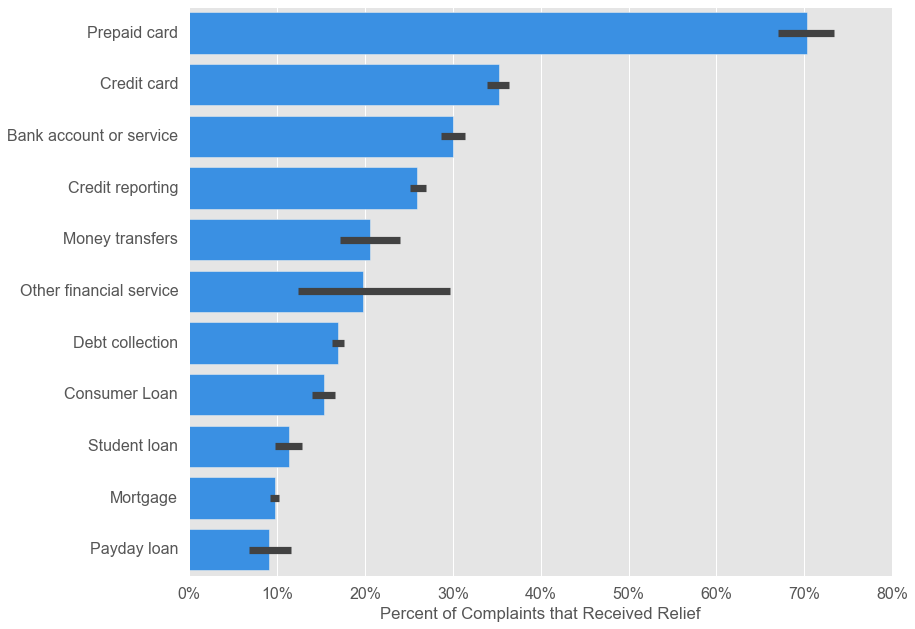

In [176]:
df['Relief Indicator'] = [x in {'Closed with non-monetary relief', 'Closed with monetary relief'} for x in df['Company response to consumer']]

products_sorted_by_relief_perc = df.groupby('Product')['Relief Indicator'].mean().sort_values(ascending=False).index

with plt.style.context('ggplot'):
    sns.barplot(y=df['Product'], x=(100*df['Relief Indicator']),order=products_sorted_by_relief_perc, color='DodgerBlue')
    plt.ylabel('')
    plt.xlabel('Percent of Complaints that Received Relief')
    percentify_x()
    output_figure('financial_products_vs_likelihood_of_relief')

In [10]:
# Focusing in on the more specific ? of "Predict whether you'll get relief (either non-monetary
# or monetary) given a credit card narrative -- i.e., what words really help you out there

In [11]:
credit_card_df = df[df['Product'] == 'Credit card']

In [13]:
complaints = naive_bayes_df['Consumer complaint narrative'].values

vect = CountVectorizer(ngram_range=(1,3), stop_words='english')
X = vect.fit_transform(complaints)
X_old = X
words = vect.get_feature_names()

In [14]:
y = naive_bayes_df['Company response to consumer'].values
enc = LabelEncoder()
y = enc.fit_transform(y)

In [15]:
clf = MultinomialNB()
clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#Confirming that column names in next line match what they are

enc.inverse_transform([0,1])

array(['Closed with explanation', 'Closed with monetary relief'], dtype=object)

In [17]:
likelihood_df = pd.DataFrame(clf.feature_log_prob_.transpose(),columns=['Explanation', 'Relief'], index=words)

likelihood_df['Percent More Likely to Get Relief'] = likelihood_df.eval('100 * (exp(Relief) - exp(Explanation))')

likelihood_df.sort_values('Percent More Likely to Get Relief')

,Explanation,Relief,Percent More Likely to Get Relief
xxxx,-4.095420,-4.242017,-0.227019
credit,-5.160470,-5.570119,-0.192898
card,-5.367546,-5.648486,-0.114272
xxxx xxxx,-5.215328,-5.350144,-0.068518
account,-5.640615,-5.836064,-0.063037
chase,-6.993470,-7.992338,-0.057981
credit card,-6.105320,-6.385217,-0.054466
capital,-7.289916,-8.069299,-0.036938
xxxx xxxx xxxx,-6.247117,-6.455371,-0.036397
report,-7.164339,-7.769194,-0.035114


In [18]:
#Setting a baseline

cross_val_score(DummyClassifier(),X,y,n_jobs=-1)

array([ 0.52770585,  0.53678756,  0.54173147])

In [19]:
# Exploring Macy's for a bit

In [20]:
macys_df = naive_bayes_df.loc[['macy' in y for y in [x.lower() for x in complaints]],:]

In [21]:
macys_df['Company response to consumer'].value_counts()

Closed with monetary relief    149
Closed with explanation         76
Name: Company response to consumer, dtype: int64

In [22]:
macys_df['Company'].value_counts()

Citibank          220
JPMorgan Chase      2
Amex                1
Capital One         1
Navy FCU            1
Name: Company, dtype: int64

In [23]:
twenty_five_oo_df = naive_bayes_df.loc[['25.00' in y for y in [x.lower() for x in complaints]],:]

In [24]:
twenty_five_oo_df['Company response to consumer'].value_counts()

Closed with monetary relief    104
Closed with explanation         74
Name: Company response to consumer, dtype: int64

In [25]:
twenty_five_oo_df['Company'].value_counts()

Synchrony Bank                      44
Citibank                            38
Bank of America                     31
Capital One                         17
JPMorgan Chase                      12
TD Bank                              9
Barclays                             8
PayPal                               4
Wells Fargo                          4
Discover                             2
Colony Brands, Inc.                  1
Continental Finance Company, LLC     1
PNC Bank                             1
Amex                                 1
Pentagon FCU                         1
First National Bank of Omaha         1
USAA Savings                         1
Zions Bancorporation                 1
U.S. Bancorp                         1
Name: Company, dtype: int64

In [26]:
twenty_five_oo_df['Issue'].value_counts()

Late fee                                    54
Billing disputes                            35
Other fee                                   12
Other                                       11
Customer service / Customer relations       10
Closing/Cancelling account                   7
Billing statement                            7
Advertising and marketing                    7
Identity theft / Fraud / Embezzlement        6
Delinquent account                           5
APR or interest rate                         4
Credit determination                         3
Credit line increase/decrease                3
Transaction issue                            3
Credit card protection / Debt protection     2
Cash advance fee                             2
Payoff process                               2
Forbearance / Workout plans                  1
Rewards                                      1
Cash advance                                 1
Sale of account                              1
Unsolicited i

In [105]:
# Checking rambling hypothesis

naive_bayes_df['char_count'] = [len(x) for x in complaints]
naive_bayes_df['smog'] = [textstat.smog_index(x) for x in complaints]
naive_bayes_df['difficult_words'] = [textstat.difficult_words(x) for x in complaints]

# Sentences need to have at least three words, so pasting on "Pizza" to make two entries of "Identity theft" work
# Pizza House! -- https://www.youtube.com/watch?v=_Iw0euc4qDk 
naive_bayes_df['readability'] = [textstat.automated_readability_index('Pizza ' + x) for x in complaints]
naive_bayes_df['lexicon_count'] = [textstat.lexicon_count(x) for x in complaints]
naive_bayes_df['syllable_count'] = [textstat.syllable_count(x) for x in complaints]
naive_bayes_df['sentence_count'] = [textstat.sentence_count('Pizza ' + x) for x in complaints]
#Add period to prevent "zero sentence" for people that typed "Identity theft" only
#Some have zero sentences, annoyingly (no punctuation)
naive_bayes_df['words_per_sentence'] = naive_bayes_df['lexicon_count']/naive_bayes_df['sentence_count']
naive_bayes_df['syllable_per_word'] = naive_bayes_df['syllable_count']/naive_bayes_df['lexicon_count']

naive_bayes_df.groupby('Company response to consumer').mean()

,char_count,word_count,smog,difficult_words,readability,lexicon_count,syllable_count,sentence_count,words_per_sentence,syllable_per_word
Company response to consumer,,,,,,,,,,
Closed with explanation,1072.776678,197.028885,6.232896,34.565927,9.886253,193.291522,261.660979,10.518320,19.494731,1.360188
Closed with monetary relief,1182.470990,218.734276,6.203510,36.153096,9.528279,214.676743,285.178450,12.016577,19.334349,1.330713


In [108]:
# Ranking companies by reading level of their complaints = interesting (AmEx does particularly well, perhaps
# unsurprisingly)

# Doing same thing with issues would be cool too

#Use Seaborn plots here to automatically get the uncertainty in there

#naive_bayes_df[large_companies_bool].groupby('Company').mean().sort_values(by='smog')

,char_count,word_count,smog,difficult_words,readability,lexicon_count,syllable_count,sentence_count,words_per_sentence,syllable_per_word
Company,,,,,,,,,,
TD Bank,1163.950820,216.967213,5.595082,34.721311,9.936885,213.598361,280.394262,11.688525,19.993065,1.317624
Wells Fargo,1078.452261,200.221106,5.743719,32.738693,9.787437,196.562814,259.882915,10.653266,19.539266,1.341173
PayPal,908.391608,166.993007,5.758042,31.755245,9.535664,163.993007,224.666434,9.090909,19.177933,1.371696
Synchrony Bank,1088.251200,200.822400,5.869920,33.795200,9.642240,197.547200,263.669760,11.256000,19.429989,1.343701
Capital One,1005.793003,185.927114,6.041691,31.727405,9.958309,182.992711,248.628280,9.938776,20.054046,1.367999
JPMorgan Chase,1109.861017,202.854237,6.043220,35.132203,9.747458,198.586441,267.934576,10.918644,19.109238,1.350870
Discover,1229.796748,224.813008,6.115447,38.658537,10.225610,220.004065,298.485366,12.227642,19.676222,1.365428
U.S. Bancorp,938.379182,173.260223,6.153160,30.568773,10.047584,170.211896,223.561338,9.081784,20.305719,1.308233
Citibank,1188.692570,219.491033,6.232707,37.767720,9.359778,215.287788,288.995303,11.994022,18.818589,1.348117


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

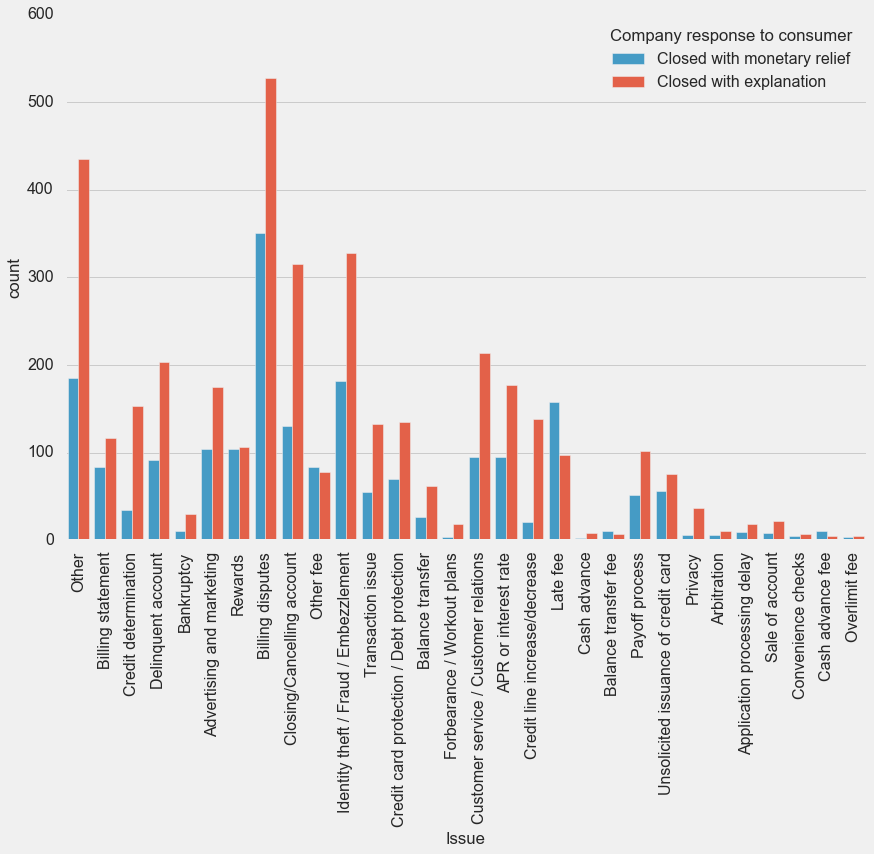

In [28]:
sns.countplot(hue=naive_bayes_df['Company response to consumer'], x=naive_bayes_df['Issue'])
plt.xticks(rotation='vertical')

In [29]:
naive_bayes_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,char_count,word_count
Complaint ID,,,,,,,,,,,,,,,,,
1745609,01/15/2016,Credit card,NaN,Other,NaN,Home Depot habitually credits my account a wee...,Company chooses not to provide a public response,Citibank,AZ,852XX,Web,01/15/2016,Closed with monetary relief,Yes,No,381,70
1746191,01/15/2016,Credit card,NaN,Billing statement,NaN,Dear representatives of The Consumer Financial...,Company chooses not to provide a public response,Citibank,NY,112XX,Web,01/15/2016,Closed with explanation,Yes,Yes,3244,615
1741441,01/15/2016,Credit card,NaN,Credit determination,NaN,I applied for a credit card with USAA and I wa...,Company believes it acted appropriately as aut...,USAA Savings,CA,913XX,Web,01/15/2016,Closed with explanation,Yes,No,812,144
1742276,01/15/2016,Credit card,NaN,Delinquent account,NaN,I believe what happened was a system error. I ...,Company chooses not to provide a public response,U.S. Bancorp,CA,949XX,Web,01/15/2016,Closed with explanation,Yes,No,814,149
1741325,01/15/2016,Credit card,NaN,Bankruptcy,NaN,I filed a Ch. XXXX Bankruptcy in the XXXX XXXX...,Company chooses not to provide a public response,Bank of America,CA,921XX,Web,01/15/2016,Closed with monetary relief,Yes,Yes,1763,299
1742048,01/15/2016,Credit card,NaN,Advertising and marketing,NaN,I applied and got approved for USAA XXXX World...,Company believes complaint is the result of an...,USAA Savings,TX,765XX,Web,01/15/2016,Closed with monetary relief,Yes,No,303,53
1740741,01/15/2016,Credit card,NaN,Other,NaN,Applied and was approved for Citi AAdvantage P...,Company chooses not to provide a public response,Citibank,SD,571XX,Web,01/15/2016,Closed with explanation,Yes,No,450,71
1741212,01/14/2016,Credit card,NaN,Rewards,NaN,I did n't receive my {$25.00} reward from the ...,Company chooses not to provide a public response,Bank of America,MA,021XX,Web,01/14/2016,Closed with explanation,Yes,No,687,129
1740698,01/14/2016,Credit card,NaN,Billing disputes,NaN,I wish to have your assistance in disputing XX...,Company chooses not to provide a public response,Wells Fargo,MN,553XX,Web,01/14/2016,Closed with explanation,Yes,No,516,93


In [30]:
temp = pd.DataFrame(naive_bayes_df.groupby(['Company']).count().iloc[:,0]).reset_index()

large_companies = temp[temp['Date received'] > 100]['Company'].values

large_companies_bool = [x in large_companies for x in naive_bayes_df['Company']]

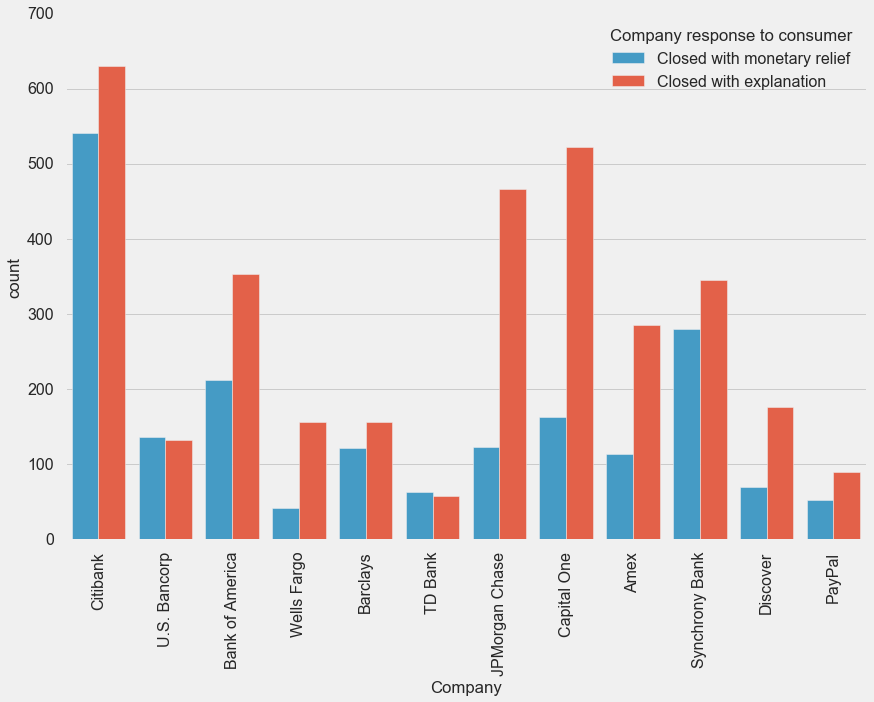

In [31]:
# Better if just plot as one, i.e., empirical likelihood of closing with monetary relief, descending for companies

with plt.style.context('fivethirtyeight'):
    sns.countplot(hue=naive_bayes_df.loc[large_companies_bool,'Company response to consumer'], x=naive_bayes_df.loc[large_companies_bool,'Company'])
    plt.xticks(rotation='vertical')

In [32]:
# Wrapper from https://gist.github.com/slaypni/b95cb69fd1c82ca4c2ff

import sys
import math

import numpy as np

sys.path.append('xgboost/wrapper/')
import xgboost as xgb


class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})

    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = dict((label, i) for i, label in enumerate(sorted(set(y))))
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round)

    def predict(self, X):
        num2label = dict((i, label)for label, i in self.label2num.items())
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])

    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)

    def score(self, X, y):
        Y = self.predict_proba(X)
        return 1 / logloss(y, Y)

    def get_params(self, deep=True):
        return self.params

    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    
    
def logloss(y_true, Y_pred):
    label2num = dict((name, i) for i, name in enumerate(sorted(set(y_true))))
    return -1 * sum(math.log(y[label2num[label]]) if y[label2num[label]] > 0 else -np.inf for y, label in zip(Y_pred, y_true)) / len(Y_pred)

In [33]:
clf = XGBoostClassifier(num_class=2)

In [34]:
predictive_colz = ['Issue','Company','char_count','word_count']

In [35]:
xgb_df = naive_bayes_df[predictive_colz].copy()

In [36]:
xgb_df['Issue'] = LabelEncoder().fit_transform(xgb_df['Issue'].values)
xgb_df['Company'] = LabelEncoder().fit_transform(xgb_df['Company'].values)

In [37]:
X = xgb_df.values

In [38]:
X

array([[  21,   22,  381,   70],
       [   8,   22, 3244,  615],
       [  14,  108,  812,  144],
       ..., 
       [  19,   13, 1985,  356],
       [  21,   67, 2268,  415],
       [  21,   13, 3946,  780]])

In [39]:
X_old.shape

(5790, 679344)

In [40]:
import scipy

In [41]:
from scipy.sparse import hstack

In [42]:
X_new = hstack([X,X_old])

In [43]:
clf.fit(X,y)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y,clf.predict(X))

0.7098445595854922

In [46]:
cross_val_score(XGBoostClassifier(num_class=2),X,y,n_jobs=-1, scoring='accuracy')

array([ 0.65336788,  0.64715026,  0.64870466])

In [47]:
cross_val_score(XGBoostClassifier(num_class=2),X_new,y,n_jobs=-1, scoring='accuracy')

array([ 0.67202073,  0.66580311,  0.66632124])

In [48]:
cross_val_score(XGBoostClassifier(num_class=2),X_old,y,n_jobs=-1, scoring='accuracy')

array([ 0.66787565,  0.65647668,  0.65854922])

In [49]:
# Topic Modeling

In [51]:
tokenizer = TreebankWordTokenizer()
s = SnowballStemmer('english')

In [52]:
texts = []
for text in complaints:
    words = []
    sents = sent_tokenize(text)
    for sent in sents:
        words += [s.stem(word) for word in word_tokenize(sent) if (word not in string.punctuation and word.lower() not in CountVectorizer(stop_words='english').get_stop_words())]
    texts.append(words)

In [53]:
#Drops infrequent words

from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
textsfilt = [[token for token in text if frequency[token] > 1] for text in texts]

In [54]:
dictionary = corpora.Dictionary(textsfilt)
dictionary.save('dict.dict')

In [55]:
corpus = [dictionary.doc2bow(text) for text in textsfilt]
corpora.MmCorpus.serialize('cc_complaints.mm',corpus)

In [56]:
HDPfitted = models.hdpmodel.HdpModel(corpus=corpus,id2word=dictionary)

In [57]:
matrix = HDPfitted.inference(corpus)

In [58]:
X_final = np.hstack([matrix,X])

In [59]:
from sklearn.cross_validation import ShuffleSplit

In [60]:
cross_val_score(XGBoostClassifier(num_class=2),X_final,y,n_jobs=-1, scoring='accuracy')

array([ 0.65854922,  0.65284974,  0.65181347])

In [61]:
X_all = hstack([X,X_old,matrix])

In [62]:
cross_val_score(XGBoostClassifier(num_class=2),X_all,y,n_jobs=-1, scoring='accuracy', cv=ShuffleSplit(y.shape[0])).mean()

Process ForkPoolWorker-24:
Process ForkPoolWorker-21:
Traceback (most recent call last):
Traceback (most recent call last):
  File "//anaconda/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "//anaconda/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "//anaconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "//anaconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "//anaconda/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "//anaconda/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "//anaconda/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 358, in get
    racquire()
  File "//anaconda/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    return recv()
Key

KeyboardInterrupt: 

In [ ]:
cross_val_score(XGBoostClassifier(num_class=2),X,y,n_jobs=-1, scoring='accuracy', cv=ShuffleSplit(y.shape[0])).mean()

In [ ]:
cross_val_score(XGBoostClassifier(num_class=2),X_old,y,n_jobs=-1, scoring='accuracy', cv=ShuffleSplit(y.shape[0])).mean()

In [ ]:
cross_val_score(XGBoostClassifier(num_class=2),matrix,y,n_jobs=-1, scoring='accuracy', cv=ShuffleSplit(y.shape[0])).mean()

In [ ]:
cross_val_score(MultinomialNB(),X_old,y,n_jobs=-1,cv=ShuffleSplit(y.shape[0])).mean()